In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
img = Image.open('t\Croksy(5).jpg').convert('L')
img = img.resize((128, 128))
img = img.rotate(-90)
img.save('test.png')

In [67]:
for filename in os.listdir('t'):
    img = Image.open('t\\' + filename).convert('L')
    t = 420
    l = 420
    width, height = img.size
    r = width - 420
    b = height - 420
    img = img.crop((l, t, r, b))
    img = img.resize((128, 128))
    img = img.rotate(-90)
    name = 't\\' + filename[:-4]+'.png'       
    img.save(name)

In [41]:
imgArr = np.array(Image.open('CZ-B-128px\Croksy(5).png'))
imgArr = imgArr.flatten()
print(imgArr.shape)
print(imgArr)

(16384,)
[174 177 182 ... 130 125 130]


In [2]:
classDic =  {
        'Codzienne': 'r',
        'Conversy': 'g',
        'Crocsy': 'b',
        'Klapki': 'c',
        'Pantofle': 'm',
        'Sandaly': 'y',
        'Trampki': 'k',
        'Zimowe': 'orange',
        'ZimoweDamskie': 'purple',
    }

def getClass(name):
    return classDic[name]

In [13]:
X = np.zeros((54,16384))
Y = []
for i,filename in enumerate(os.listdir('CZ-B-128px')):
    im1D = np.array(Image.open('CZ-B-128px\\' + filename)).flatten()
    X[i] = im1D
    Y.append(getClass(filename[:-7]))
# print(X)
# print(Y)

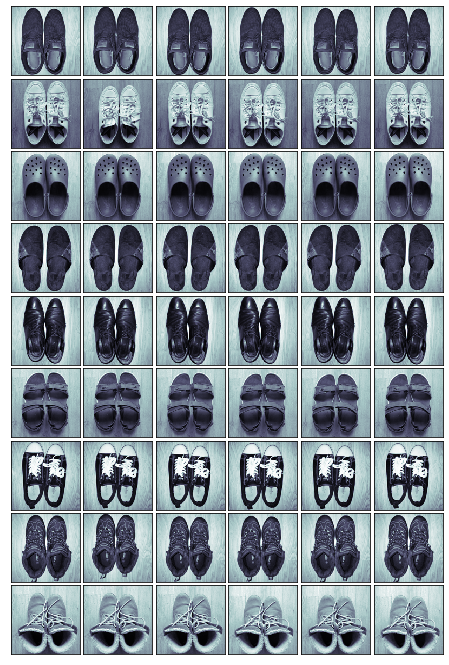

In [14]:
fig = plt.figure(figsize=(6,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(54): 
    ax = fig.add_subplot(9, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape((128, 128)), cmap=plt.cm.bone, interpolation='nearest') 

plt.show()

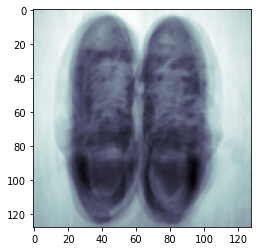

In [5]:
m = X.mean(axis=0)
plt.imshow(m.reshape((128, 128)), cmap=plt.cm.bone) 

X_trans = X
for i in range(len(X)):
    X_trans[i] -= m

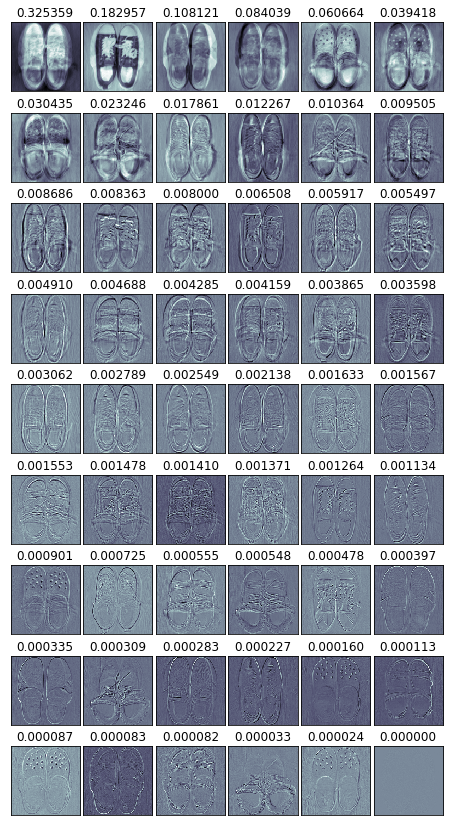

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_trans)

fig = plt.figure(figsize=(6,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.25, hspace=0.05, wspace=0.05)
for i in range(54): 
    ax = fig.add_subplot(9, 6, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((128, 128)), cmap=plt.cm.bone, interpolation='nearest') 
    ax.set_title(f'{pca.explained_variance_ratio_[i]:.6f}')

plt.show()

# print(np.cumsum(pca.explained_variance_ratio_))

0.935791049619921


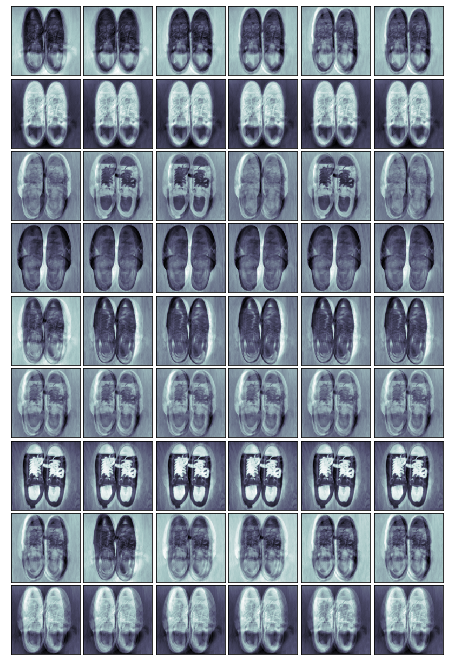

In [15]:
pca16 = pca

print(sum(pca16.explained_variance_ratio_[:16]))

for i in range(16,54):
    pca16.components_[i] = 0
    
X_inv16 = pca16.inverse_transform(X_pca)

fig = plt.figure(figsize=(6,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(54): 
    ax = fig.add_subplot(9, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_inv16[i].reshape((128, 128)), cmap=plt.cm.bone, interpolation='nearest') 

plt.show()

0.7004763093308377


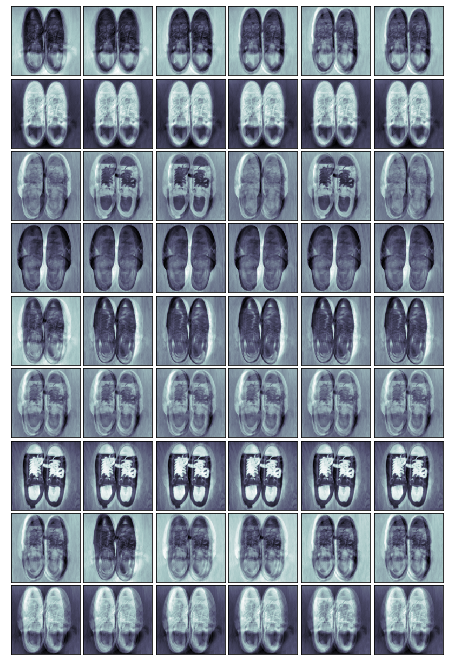

In [16]:
pca4 = pca

print(sum(pca4.explained_variance_ratio_[:4]))

for i in range(4,54):
    pca4.components_[i] = 0
    
X_inv4 = pca4.inverse_transform(X_pca)

fig = plt.figure(figsize=(6,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(54): 
    ax = fig.add_subplot(9, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_inv4[i].reshape((128, 128)), cmap=plt.cm.bone, interpolation='nearest') 

plt.show()

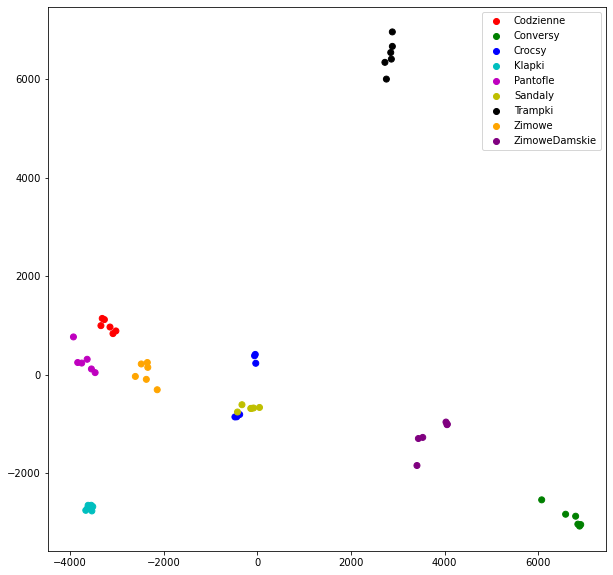

In [9]:
pca_digits=PCA(2)
X_proj = pca_digits.fit_transform(X_trans)

plt.figure(figsize=(10,10))
plt.scatter(X_proj[:,0], X_proj[:,1], c=Y) 
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in classDic.values()]
plt.legend(markers, classDic.keys(), numpoints=1)

plt.show() 